# 03_Beginning of Deeplearning - XOR

## `XOR` 문제 풀이

### - `or` : 둘 중 하나가 1이면 답도 1, 둘 중 하나가 1이 아니면 답은 0
### - `xor` : 둘 중 어느 하나라도 동일하지 않으면 1, 하나라도 동일하면 0 

In [1]:
import numpy as np

X = np.array([ [0,0],
                [1,0],
                [0,1],
                [1,1] ])
                
y = np.array([[0],[1],[1],[0]])

In [2]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)),
                        # 출력 2개              
                                                    # input 2개
                            # 활성화 함수 : 시그모이드는 0 ~ 1 사이 // 선형이 되면 안되니까 비선형으로 만들었다.
    tf.keras.layers.Dense(1, activation='sigmoid')
                        # 출력 1개
])

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-05-31 12:11:24.786015: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-31 12:11:24.786406: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


> ### - `입력` 2개 > `출력` 2개 > `출력` 1개

![](./lecture_image/03-01.png)

- `찾아야 하는 미지수`는 9개이다

In [4]:
# model.compile
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')
                # optimizer > SGD
                                                # learning rate : 0.1 (10%)
                                                        # loss : Mean Squared Error

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 학습
hist = model.fit(X, y, epochs = 5000, batch_size=1)
                        # epochs : 지저된 횟수만큼 학습을 진행
                                    # batch_size : 한번의 학습에 사용될 데이터의 수를 지정

2022-05-31 12:39:23.095798: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-31 12:39:23.257722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/5000
4/4 [==============================] - 2s 3ms/step - loss: 0.2831
Epoch 2/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2798
Epoch 3/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2769
Epoch 4/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2742
Epoch 5/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2716
Epoch 6/5000
4/4 [==============================] - 0s 6ms/step - loss: 0.2694
Epoch 7/5000
4/4 [==============================] - 0s 7ms/step - loss: 0.2673
Epoch 8/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2655
Epoch 9/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2639
Epoch 10/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2624
Epoch 11/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2611
Epoch 12/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.2598
Epoch 13/5000
4/4 [==============================

In [7]:
# 학습결과
model.predict(X)
    # 0.5 보다 크면 1, 작으면 0

2022-05-31 12:59:12.268159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[0.04449547],
       [0.9462154 ],
       [0.9462803 ],
       [0.05394369]], dtype=float32)

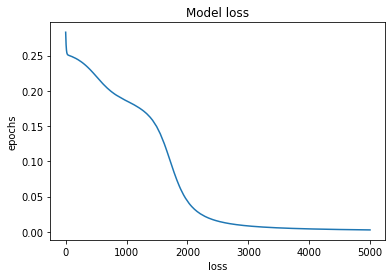

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.xlabel('loss')
plt.ylabel('epochs')
plt.show()

In [10]:
# 학습에서 찾은 가중치
for w in model.weights:
    print('---')
    print(w)

---
<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-5.838176 ,  3.9017007],
       [-5.8597937,  3.9052505]], dtype=float32)>
---
<tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([ 2.1322942, -6.064127 ], dtype=float32)>
---
<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-7.7381334],
       [-7.911715 ]], dtype=float32)>
---
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([3.8694098], dtype=float32)>


# 정리
> ### `자료 (numpy array)`
> ### `모델 만들기`
> ### `모델 컴파일`
> ### `학습`
> ### `예측`
> ### `모델 손실률 확인`
> ### `학습 가중치 확인`